<img src='Capture-4.JPG'>

## Task # 4 -To Explore Decision Tree Algorithm

### For the given ‘Iris’ dataset, create Decision Tree classifier and visualize it graphically. The purpose is if we feed any new data to this classifier, it would be able to predict the right class accordingly.

### Loading the necessary libraries

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn import tree

### Reading the data

In [3]:
iris=pd.read_csv("Iris (1).csv")
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


## Exploratory Data Analysis

### Shape of Data

In [4]:
# Shape of Data
iris.shape

(150, 6)

In [5]:
iris.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

### Datatypes of variables

In [6]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


### Checking for Duplicates

In [7]:
duplicates=iris.duplicated()
sum(duplicates)

0

**No duplicates present .**

### Describing Data

In [8]:
iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


### Checking for  Missing Values

In [9]:
iris.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

**No missing values present.**

In [10]:
feature = iris.columns[1:-1]
for i in enumerate(feature):
    print(i)

(0, 'SepalLengthCm')
(1, 'SepalWidthCm')
(2, 'PetalLengthCm')
(3, 'PetalWidthCm')


### Univariate Analysis

#### i. Plotting Histogram to see the Distribution of data:

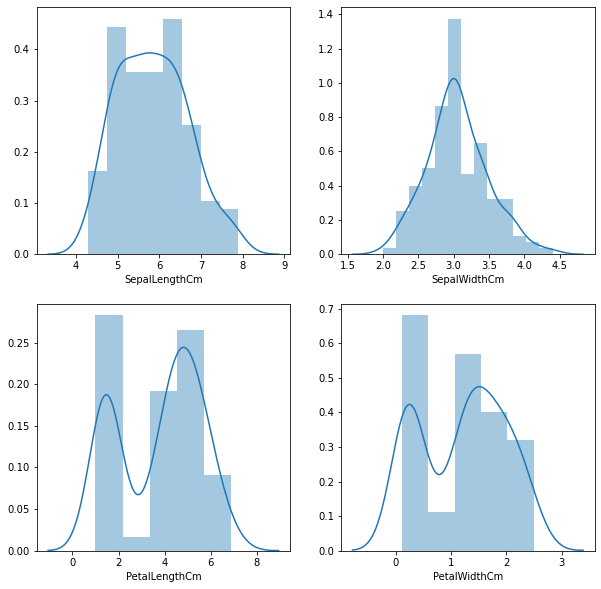

In [11]:
plt.figure(figsize = (10,10))
feature = iris.columns[1:-1]
for i in enumerate(feature):
    plt.subplot(2,2, i[0]+1)
    sns.distplot(iris[i[1]])

#### ii. Plotting HeatMap to find Correlations:

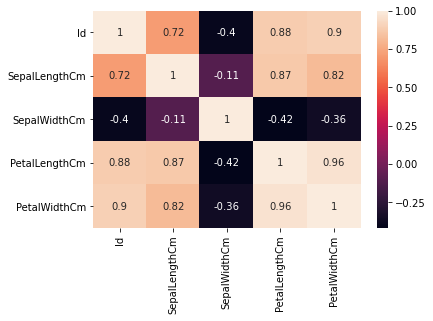

In [12]:
sns.heatmap(iris.corr(),annot=True,cmap='rocket')

#### iii. Checking for  Outliers through Boxplots :

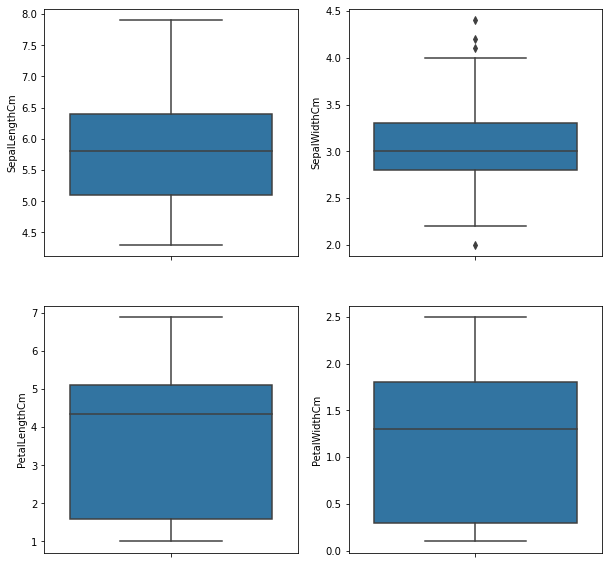

In [13]:
plt.figure(figsize = (10,10))
feature = iris.columns[1:-1]
for i in enumerate(feature):
    plt.subplot(2,2, i[0]+1)
    sns.boxplot(iris[i[1]],orient='vert')

#### Taking care of outliers: Outlier Capping in SepalWidthCm column

In [14]:
# capping

q1 = iris['SepalWidthCm'].quantile(0.01)
q4 = iris['SepalWidthCm'].quantile(0.99)

iris['SepalWidthCm'][iris['SepalWidthCm']<= q1] = q1
iris['SepalWidthCm'][iris['SepalWidthCm']>= q4] = q4

In [15]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


### Preparing the data : 
**Assigning all the features to 'x' and target variable to 'y'.**

In [16]:
x=iris[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']].values
y=iris['Species'].values

### Splitting the data into Training and Testing data:

In [17]:
X_train,X_test,y_train,y_test=train_test_split(x,y,train_size=0.7,test_size=0.3,random_state=10)

## Training the data :

### Defining the Decision Tree Algorithm

In [24]:
# Defining the decision tree algorithm

dtree=DecisionTreeClassifier(random_state=0)
dtree.fit(X_train,y_train)

print('Decision Tree Classifer Created')

Decision Tree Classifer Created


### Making Predictions on the Testing Data:

In [25]:
y_pred=dtree.predict(X_test)
y_pred

array(['Iris-versicolor', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-setosa', 'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-virginica', 'Iris-setosa',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-setosa', 'Iris-versicolor'], dtype=object)

In [26]:
Feature_names=list(iris[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']])

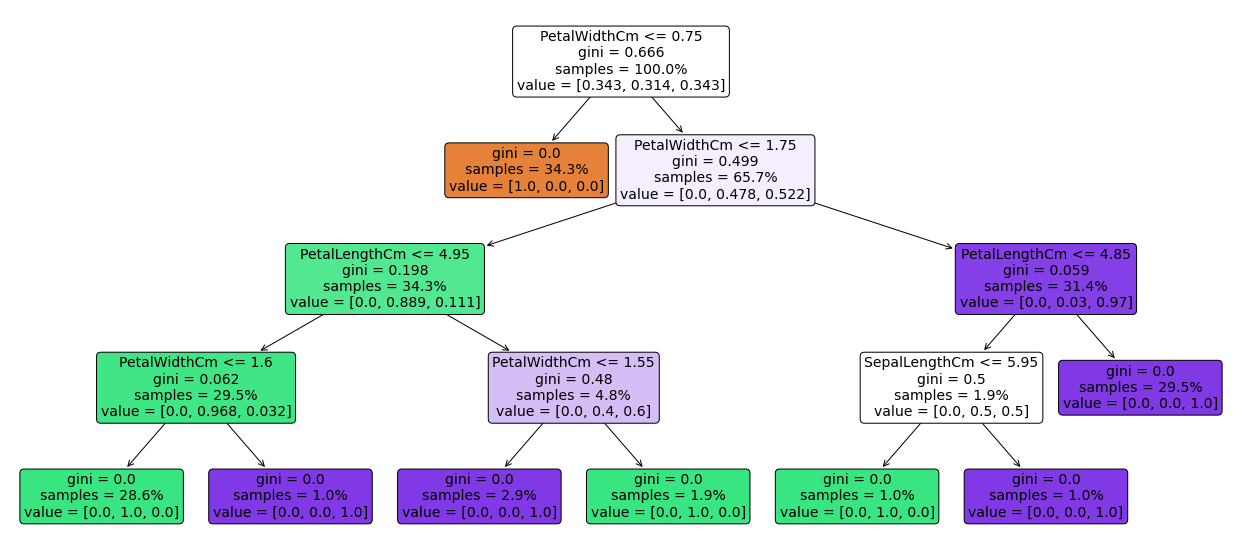

In [27]:
Tree=plt.figure(figsize=(22,10))
Tree=tree.plot_tree(dtree,feature_names=Feature_names,fontsize=14,filled='True',proportion=True,rounded=10)
plt.show()

## Model Evaluation

In [28]:
print("Model Accuracy is : ",round(accuracy_score(y_pred,y_test)*100,2))

print(classification_report(y_pred,y_test))

Model Accuracy is :  97.78
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        14
Iris-versicolor       1.00      0.94      0.97        18
 Iris-virginica       0.93      1.00      0.96        13

       accuracy                           0.98        45
      macro avg       0.98      0.98      0.98        45
   weighted avg       0.98      0.98      0.98        45



### Accuracy is 97.78 %